Introducción rápida a Keras para principiantes --- 13:53 min
===

* Última modificación: Mayo 4, 2022 | [YouTube](https://youtu.be/nlA8QXQZLTY)

* Adaptado de: Adaptado de: https://www.tensorflow.org/tutorials/quickstart/beginner

![assets/fashion-mnist-sprite.png](assets/fashion-mnist-sprite.png)

Importación de librerías
---

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf

Carga de datos
--

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#
# Escalamiento del dataset
#
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape,

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Especificación del modelo
--

In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)

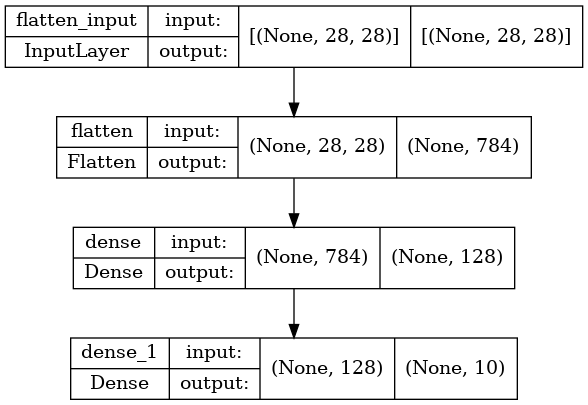

In [5]:
tf.keras.utils.plot_model(
    model,
    "/tmp/model.png",
    show_shapes=True,
)

Pronóstico con el modelo sin entrenar
--

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.47714996, -0.8644776 ,  0.7500431 ,  0.6793618 , -0.23679623,
         0.08138776, -0.2058231 , -0.9334694 ,  0.48710698, -0.03317261]],
      dtype=float32)

In [7]:
#
# softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
#
tf.nn.softmax(predictions).numpy()

array([[0.13658264, 0.03570541, 0.17943679, 0.1671918 , 0.0668856 ,
        0.09194289, 0.06898967, 0.03332509, 0.13794939, 0.08199082]],
      dtype=float32)

In [8]:
#
# La suma del vector de salida es ~ 1.0
#
sum(tf.nn.softmax(predictions).numpy()[0])

1.0000001080334187

Función de pérdida
--

In [9]:
#
# Esta función toma un vector de logits y un indice True y retorna el valor de
# la pérdida de entropía cruzada
#
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
)

In [10]:
loss_fn(
    y_train[:1],
    predictions, # Predictions fue calculado en la celda [6]
).numpy()

2.3865876

Compilación del modelo
--

In [11]:
model.compile(
    optimizer=tf.optimizers.SGD(
        learning_rate=0.01,
        momentum=0.0,
    ),
    loss=loss_fn,
    metrics=["accuracy"],
)

Entrenamiento del modelo
---

In [12]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6396 - accuracy: 0.8391
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3337 - accuracy: 0.9063
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2861 - accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2550 - accuracy: 0.9285
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2315 - accuracy: 0.9354


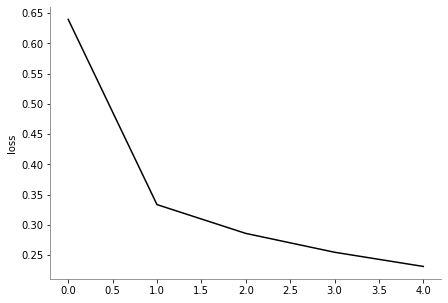

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(history.history["loss"], "k-")
plt.ylabel("loss")

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

Evaluación
---

In [14]:
model.evaluate(
    x_test,
    y_test,
    verbose=2,
)

313/313 - 2s - loss: 0.2142 - accuracy: 0.9403 - 2s/epoch - 5ms/step


[0.21415063738822937, 0.9402999877929688]

Generación de un nuevo modelo
--

In [15]:
probability_model = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Softmax(),
    ]
)

Uso del modelo
---

In [16]:
probability_model(
    x_test[:5],
)

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.2233661e-04, 5.1629485e-07, 3.3434684e-04, 1.2950627e-03,
        2.0098219e-06, 9.4352014e-05, 2.3028504e-08, 9.9750781e-01,
        3.2968463e-05, 6.1050412e-04],
       [9.5946010e-04, 5.5734374e-05, 9.7443330e-01, 7.9161162e-03,
        5.5581626e-08, 4.1780234e-03, 1.1130940e-02, 6.3259469e-09,
        1.3263094e-03, 5.0014329e-08],
       [6.6477653e-05, 9.6917033e-01, 1.2771892e-02, 5.2055223e-03,
        4.6557718e-04, 1.1868986e-03, 1.7830061e-03, 4.7653099e-03,
        3.4761664e-03, 1.1089091e-03],
       [9.9915826e-01, 2.5097746e-09, 2.1159019e-04, 2.4076244e-05,
        1.0019486e-07, 4.7437951e-04, 3.6667730e-05, 3.8384635e-05,
        2.5984185e-05, 3.0618197e-05],
       [2.8520491e-04, 4.7726408e-06, 3.0648094e-03, 1.6724443e-04,
        9.6385598e-01, 5.4462272e-04, 1.9077833e-03, 3.1877500e-03,
        2.3713184e-03, 2.4610531e-02]], dtype=float32)>

Resumen
--

In [17]:
#
# Carga los datos
#
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#
# Escala los datos al rango [0, 1]
#
x_train, x_test = x_train / 255.0, x_test / 255.0

#
# Construye el modelo como una secuencia de capas
#
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)

#
# Define la función de pérdida
#
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
)

#
# Compila y entrena el modelo
#
model.compile(
    optimizer=tf.optimizers.SGD(
        learning_rate=0.01,
        momentum=0.0,
    ),
    loss=loss_fn,
    metrics=["accuracy"],
)

model.fit(
    x_train,
    y_train,
    epochs=5,
)

#
# Construye el modelo final
probability_model = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Softmax(),
    ]
)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6491 - accuracy: 0.8362
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3356 - accuracy: 0.9063
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2877 - accuracy: 0.9187
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2575 - accuracy: 0.9271
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2342 - accuracy: 0.9337
